### Project - Embedding Words as Distributions with a Bayesian Skip-gram Model (Brazinskas et al., 2018 )

We consider our project to be composed of two parts. The first part is literature review, deriving the existing model, commenting on the previous work and implementing it. The second part is making extensions on the existing work.

# Part 1

## 1.1. Comments on Previous Work

In this part we are going to go through the paper, derive the appendix and implement the original work.

### 1.Generative Process

For an **observed** word $w_{i}$:   
$\;\;\;\;$Draw $z_{i}|w_{i} \sim p_{\theta}(\vec{z_{i}}|w_{i})$   
$\;\;\;\;$$\;\;\;\;$For each $\vec{z_{i}}$:   
$\;\;\;\;$$\;\;\;\;$$\;\;\;\;$Draw context word $c_{ij} \sim p_{\theta}(c_{ij}|\vec{z_{i}},w_{i})$

### 2.Graphical Model

I did a slight correction on the graphical model. Note that the words are observed and accepted as being random. Yet, in the paper they are shown in the graphical model as **given**. That is also the same case in regression. Words are like **covariates**. Thus, they should be represented as a square.

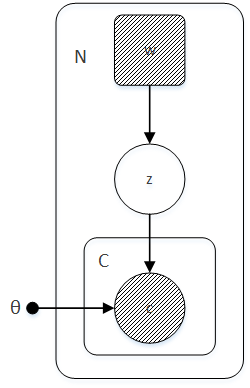

### 3.The Likelihood

$$P(C,Z|W) = \prod_{i=1}^{N}P(\vec{z_{i}}|w_{i})\prod_{j=1}^{C}P(c_{ij}|\vec{z_{i}},w_{i})$$

### 4.Inference

We are going to user Variational Inference and define a posterior for $\vec{z_{i}}$ under another distribution $q$. That is    
   
$$q(\vec{z_{i}}|w_{i},\vec{c_{i}};\phi) = q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}}) $$

Therefore, we want to  

$$\min D_{KL}\Bigg(  q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}}) ||  p_{\theta}(\vec{z_{i}}|w_{i},\vec{c_{i}}) \Bigg)$$   


$$$$
   
    
$$\min E_{q}\left[\log  \frac{q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})}{p_{\theta}(\vec{z_{i}}|w_{i},\vec{c_{i}})} \right]$$

$$$$

$$\min E_{q}\bigg[\log q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}}) \bigg] - E_{q}\bigg[\log p_{\theta}(\vec{z_{i}}|w_{i},\vec{c_{i}}) \bigg] $$

$$$$

$$\min E_{q}\bigg[log\left(q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})\right)\bigg] - E_{q}\Bigg[log\left(p_{\theta}(\vec{z_{i}},w_{i},\vec{c_{i}})\right)- log\left(p_{\theta}(w_{i},\vec{c_{i}})\right) \Bigg] $$

$$$$

$$\min E_{q}\bigg[\log q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})\bigg] - E_{q}\Bigg[\log p_{\theta}(\vec{z_{i}},w_{i},\vec{c_{i}}) - \log p_{\theta}(\vec{c_{i}}|w_{i}) - \log p_{\theta}(w_{i}) \Bigg] $$


$$$$

$$\min E_{q}\bigg[\log q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}}) \bigg] - E_{q}\Bigg[\log p_{\theta}(\vec{c_{i}}|\vec{z_{i}},w_{i})  +  \log p_{\theta}(\vec{z_{i}}|w_{i})  + \log p_{\theta}(w_{i}) - \log p_{\theta}(\vec{c_{i}}|w_{i}) - \log p_{\theta}(w_{i}) \Bigg] $$

$$$$

$$\min E_{q}\bigg[log q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}}) \bigg] - E_{q}\Bigg[log p_{\theta}(\vec{c_{i}}|\vec{z_{i}})  +  log p_{\theta}(\vec{z_{i}}|w_{i})  - log p_{\theta}(\vec{c_{i}}|w_{i}) \Bigg] $$

$$$$

Since $p_{\theta}(\vec{c_{i}}|w_{i})$ is constant with respect to $q_{\phi}$ it can leave the expectation


$$\min E_{q}\bigg[\log q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}}) \bigg] - E_{q}\Bigg[\log p_{\theta}(\vec{c_{i}}|\vec{z_{i}})  +  \log p_{\theta}(\vec{z_{i}}|w_{i}) \Bigg] - \log (p_{\theta}(\vec{c_{i}}|w_{i})  $$

$$$$

We can now, write a new $D_{KL}$ by grouping $q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})$ and $p_{\theta}(\vec{z_{i}}|w_{i})$


$$\min E_{q}\Bigg[\log q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}}) - \log p_{\theta}(\vec{z_{i}}|w_{i}) \Bigg] - E_{q}\Bigg[\log p_{\theta}(\vec{c_{i}}|\vec{z_{i}})\Bigg] + \log p_{\theta}(\vec{c_{i}}|w_{i})  $$

$$$$

$$\min D_{KL}\Bigg(q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})|| p_{\theta}(\vec{z_{i}}|w_{i}) \Bigg)- E_{q}\Bigg[\log p_{\theta}(\vec{c_{i}}|\vec{z_{i}}) \Bigg] + \log p_{\theta}(\vec{c_{i}}|w_{i})  $$

$$$$

Since the above term is $$ D_{KL}\Bigg(  q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}}) ||  p_{\theta}(\vec{z_{i}}|w_{i},\vec{c_{i}}) \Bigg) $$ and it is always greater than 0, the **lower bound is**

$$$$

$$ D_{KL}\Bigg(q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})|| p_{\theta}(\vec{z_{i}}|w_{i}) \Bigg)- E_{q}\Bigg[\log p_{\theta}(\vec{c_{i}}|\vec{z_{i}})\Bigg] + \log p_{\theta}(\vec{c_{i}}|w_{i}) \geq 0  $$

$$$$

Thus, 

$$$$

$$ \log p_{\theta}(\vec{c_{i}}|w_{i})  \geq E_{q}\Bigg[\log p_{\theta}(\vec{c_{i}}|\vec{z_{i}})\Bigg] - D_{KL}\Bigg(q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})|| p_{\theta}(\vec{z_{i}}|w_{i}) \Bigg)   $$

### 5.The Variational Distribution, Its Generative Process and Encoder

The Variational Distribution is modeled above as $q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})$, inicating the generative process of

For an **observed** word $w_{i}$ and its context words $\vec{c_{i}}$:   
$$$$
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$Generate parameters $\mu(z_{i})$ ,$\sigma(z_{i})$ = $F(w_{i},\vec{c_{i}};\phi)$   
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$Draw $z_{i}|w_{i}, \vec{c_{i}} \sim N(\mu(z_{i}),\sigma(z_{i}))$

$$$$

Yielding the graphical model

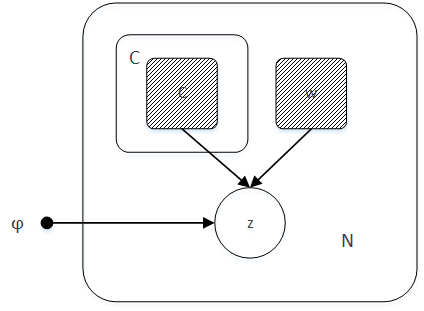

**5.1. Neural Network - $F(w_{i},\vec{c_{i}};\phi)$**

**Inputs:** The variational distribution is, by definition, the probability of latent varaible given all the observed. The observed variables in our model are **center word** $w_{i}$ and **context words** $c_{ij}$ or $\vec{c_{i}}$. We are going to represent the network inputs as one-hot encoded vectors of $R_{w_{i}}$ and $R_{c_{ij}}$.

For each context word, we are going to concatenate its center word with itself. That is $R_{w_{i},c_{ij}} = [R_{c_{ij}},R_{w_{i}}]^{T}$

$$$$

**Ex:**

$R_{w_{i}} = [0,0,0,1,0,0...,0,0]$   
$R_{c_{ij}} = [1,0,0,0,0,0...,0,0]$

Yielding a concatenation of

$R_{w_{i},c_{ij}} = [1,0,0,0,0,0...,0,0,0,0,0,1,0,0...,0,0]$

$$$$

$$$$

As such neural network -  $F(w_{i},\vec{c_{i}};\phi)$ looks like:

$$$$

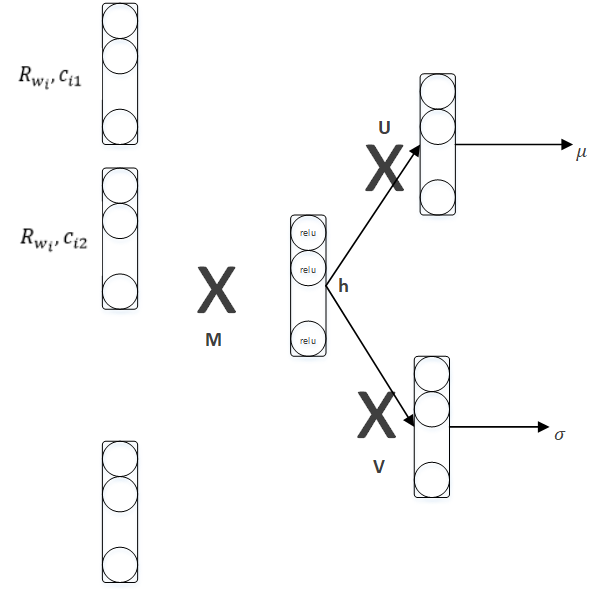

### 6. Decoder and Reconstruction Error

In this section we are going to model $p_{\theta}(c_{ij}|z_{i})$. We already showed the generative process for this value. 

We can re-write $P_{\theta}(c_{ij}|z_{i})$ as

$$P_{\theta}(c_{ij}|z_{i}) = \frac{P_{\theta}(z_{i}|c_{ij})P_{\theta}(c_{ij}) }{P_{\theta}(z_{i})}$$

$$$$

Since $p_{\theta}(z_{i}) = \sum_{j}P_{\theta}(c_{ij},z_{i})$


$$P_{\theta}(c_{ij}|z_{i}) = \frac{P_{\theta}(z_{i}|c_{ij})P_{\theta}(c_{ij}) }{\sum_{k}P_{\theta}(c_{ik},z_{i})
}$$


Let's define 

$$P_{\theta}(c_{ij}|z_{i}) \sim N(z_{i}; \mu_{c_{ij}},\sigma_{c_{ij}})$$

and approximate $P(c_{ij})$ by simply the frequency of words.

Then 

$$P_{\theta}(c_{ij}|z_{i}) = \frac{P_{\theta}(z_{i}|c_{ij})P_{\theta}(c_{ij}) }{\sum_{j}P_{\theta}(c_{ij},z_{i})
} = \frac{N(z_{i}; \mu_{c_{ij}},\sigma_{c_{ij}})P(c_{ij})}{\sum_{k} N(z_{i}; \mu_{c_{ik}},\sigma_{c_{ik}})}$$

$$$$

**Question:** Normal distribution is continuous, shouldn't we take the integral to get the exact probability value?

$$$$


**Answer:** For a continuous random variable

$$$$

$$\frac{P(X=a)}{P(X=b)} = \lim_{\epsilon \to 0} \frac{P(a-\epsilon<X<a+\epsilon)}{P(b-\epsilon<X<b+\epsilon)} $$

$$$$

Multiplying numerator and denominator won't change the result, thus

$$$$

$$\frac{P(X=a)}{P(X=b)} = \lim_{\epsilon \to 0} \frac{P(a-\epsilon<X<a+\epsilon)d{\epsilon}}{P(b-\epsilon<X<b+\epsilon)d{\epsilon}} $$

$$$$

Let's group them

$$$$

$$\frac{P(X=a)}{P(X=b)} = \lim_{\epsilon \to 0} \frac{P(a-\epsilon<X<a+\epsilon)d{\epsilon}}{P(b-\epsilon<X<b+\epsilon)d{\epsilon}} $$

$$$$


$$\frac{P(X=a)}{P(X=b)} = \lim_{\epsilon \to 0} \frac{P(a-\epsilon<X<a+\epsilon)}{d{\epsilon}} \frac{d\epsilon}{P(b-\epsilon<X<b+\epsilon)} $$

$$$$

Since for a continuous random variable,

$$$$

$$\frac{P(a-\epsilon<X<a+\epsilon)}{d{\epsilon}} = f(a)$$ 

$$$$

Then

$$$$

$$\frac{P(X=a)}{P(X=b)} = \frac{f(a)}{f(b)}$$

$$$$

Thus if

$$$$

$$P(X=a) = \int N(\mu,\sigma)$$

$$$$

Then

$$$$

$$\frac{P(X=a)}{P(X=b)} =  \frac{N(a;\mu,\sigma)}{N(b;\mu,\sigma)}$$

**6.1. Reconstruction Error - $ E_{q}\Bigg[\log p_{\theta}(\vec{c_{i}}|\vec{z_{i}})\Bigg]$**

In the above part, we have derived $P_{\theta}(c_{ij}|z_{i})$. To find the reconstruction error, we will simply plug this into $E_{q}\Bigg[\log p_{\theta}(\vec{c_{i}}|\vec{z_{i}})\Bigg]$.

$$$$

$$E_{q}\Bigg[\log p_{\theta}(\vec{c_{i}}|\vec{z_{i}})\Bigg] = E_{q}\Bigg[\log \frac{N(z_{i}; \mu_{c_{ij}},\sigma_{c_{ij}})P(c_{ij})}{\sum_{k} N(z_{i}; \mu_{c_{ik}},\sigma_{c_{ik}})}\Bigg]$$

$$$$

$$E_{q}\Bigg[\log p_{\theta}(\vec{c_{i}}|\vec{z_{i}})\Bigg] = E_{q}\Bigg[\log {N(z_{i}; \mu_{c_{ij}},\sigma_{c_{ij}})P(c_{ij})} -\log {\sum_{k} N(z_{i}; \mu_{c_{ik}},\sigma_{c_{ik}})}\Bigg]$$

$$$$

The operation $\sum_{j} N(z_{i}; \mu_{c_{ij}},\sigma_{c_{ij}})$ is computationally very expensive as it size of vocabulary, $|V|$ can be very large. 

$$$$

We don't want to compute $\sum_{k}  N(z_{i}; \mu_{c_{ik}},\sigma_{c_{ik}})$ but want to approximate it. We need to find an unbiased estimator for this sum. That is $E_{q(\tilde{c})}[ N(z_{i}; \mu_{c_{ik}},\sigma_{c_{ik}})]$

$$$$

Then an unbiased estimator for the reconstruction error becomes 

$$$$

$$E_{q}\Bigg[\log p_{\theta}(\vec{c_{i}}|\vec{z_{i}})\Bigg] = E_{q}\Bigg[\log {N(z_{i}; \mu_{c_{ij}},\sigma_{c_{ij}})P(c_{ij})} -\log {E_{q(\tilde{c})}\Bigg[ N(z_{i}; \mu_{c_{ik}},\sigma_{c_{ik}})\Bigg]}\Bigg]$$

$$\geq$$

$$E_{q}\Bigg[\log {N(z_{i}; \mu_{c_{ij}},\sigma_{c_{ij}})P(c_{ij})} -{E_{q(\tilde{c})}\Bigg[ \log N(z_{i}; \mu_{c_{ik}},\sigma_{c_{ik}})\Bigg]}\Bigg]$$

$$$$

$$E_{q}\Bigg[\log {N(z_{i}; \mu_{c_{ij}},\sigma_{c_{ij}})P(c_{ij})} - \sum_{\tilde{c_{k}}}\log  N(z_{i}; \mu_{c_{ik}},\sigma_{c_{ik}})\Bigg]$$

**6.2.Approximation of the log-partition function**

Recall that we derived our loss as

$$$$

$$\min D_{KL}\Bigg(q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})|| p_{\theta}(\vec{z_{i}}|w_{i}) \Bigg)- E_{q}\Bigg[\log p_{\theta}(\vec{c_{i}}|\vec{z_{i}}) \Bigg] + \log p_{\theta}(\vec{c_{i}}|w_{i})  $$ 

If we remove the constant and make max

$$$$

$$\max -D_{KL}\Bigg(q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})|| p_{\theta}(\vec{z_{i}}|w_{i}) \Bigg) + E_{q}\Bigg[\log p_{\theta}(\vec{c_{i}}|\vec{z_{i}}) \Bigg]$$ 

We have also derived the Reconstruction Error

$$$$

$$\max -D_{KL}\Bigg(q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})|| p_{\theta}(\vec{z_{i}}|w_{i}) \Bigg) + E_{q}\Bigg[\log {N(z_{i}; \mu_{c_{ij}},\sigma_{c_{ij}})P(c_{ij})} -\log {\sum_{k} N(z_{i}; \mu_{c_{ik}},\sigma_{c_{ik}})}\Bigg]$$

Since we are only summing a small portion and using the lower bound

$$$$

$$\max -D_{KL}\Bigg(q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})|| p_{\theta}(\vec{z_{i}}|w_{i}) \Bigg) + E_{q}\Bigg[\log {N(z_{i}; \mu_{c_{ij}},\sigma_{c_{ij}})P(c_{ij})} - {\sum_{\tilde{c_{k}}}\log N(z_{i}; \mu_{c_{ik}},\sigma_{c_{ik}})}\Bigg]$$

$$$$

Adding $ E_{q}\bigg[\log q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}}) \bigg] -  E_{q}\bigg[\log q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}}) \bigg] $ to above equation won't change the result

$$$$

$$\max E_{q}\Bigg[\log {N(z_{i}; \mu_{c_{ij}},\sigma_{c_{ij}})P(c_{ij})} -  \log q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}}) \bigg]  +E_{q}\Bigg[\log q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}}) - {\sum_{\tilde{c_{k}}}\log N(z_{i}; \mu_{c_{ik}},\sigma_{c_{ik}})}\Bigg]-D_{KL}\Bigg(q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})|| p_{\theta}(\vec{z_{i}}|w_{i}) \Bigg) $$

$$$$

$$\max - \sum_{j} D_{KL}\Bigg(q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})|| N(z_{i}; \mu_{c_{ij}},\sigma_{c_{ij}})\Bigg) + \sum_{\tilde{c_{k}}} D_{KL}\Bigg(q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})|| N(z_{i}; \mu_{c_{ik}},\sigma_{c_{ik}})\Bigg) -D_{KL}\Bigg(q_{\phi}(\vec{z_{i}}|w_{i},\vec{c_{i}})|| p_{\theta}(\vec{z_{i}}|w_{i}) \Bigg) $$

## 1.2. Implementation of the Previous Work

In this section we are going to implement the previous work.

In [1]:
import pandas as pd
import numpy as np

**1.2.1. Data from BSG**

The data thats provided at GitHub page used by the BSG is "A small dataset consisting of 15 million tokens dataset is available for smoke tests of the setup".

In [2]:
file = open("2M\\news.en-00001-of-00100","r", encoding="utf8")
smoke_data = [r for r in file]

In [3]:
smoke_data[0]

'The U.S. Centers for Disease Control and Prevention initially advised school systems to close if outbreaks occurred , then reversed itself , saying the apparent mildness of the virus meant most schools and day care centers should stay open , even if they had confirmed cases of swine flu .\n'

In [5]:
with open('2M\\sample_news.en-00001-of-00100', mode='wt', encoding='utf-8') as myfile:
    myfile.write('\n'.join(smoke_data[:10]))

**1.2.2. Clinical Data**

In [4]:
data = pd.read_json("2M\\NOTEEVENTS_tokenized_subsampled.json")
data = data.rename(columns={0: "type", 1: "tokens"})
data["id"] = data.index
dtype = data[["id","type"]]
dtokens = data[["id","tokens"]]
clinical_data = list(dtokens["tokens"])

In [20]:
train_data[0]

'radiologic studies radiologic studies also included chest ct which confirmed cavitary lesions in left lung apex consistent infectious this also moderate-sized left pleural effusion head ct head ct showed no intracranial hemorrhage or mass effect but old infarction consistent past medical history abdominal ct abdominal ct showed lesions t10 and sacrum most likely secondary osteoporosis these can be followed by repeat imaging as an outpatient . m.d dictated by : medquist36 d 12:11 t 12:21 job #'

We are going to create our input data similar to "smoke tests" tokens. Save the texts to a template seperated by new lines and encoded with utf-8.

**Entire data:**

Data we will use for training.

In [31]:
with open('2M\\train_sample_data.en-00003-of-00100', mode='wt', encoding='utf-8') as myfile:
    myfile.write('\n'.join(train_data))

**Sample data:**

Sample data to perform initial diagnostics for the BSG model. 

In [ ]:
with open('2M\\train_sample_data.en-00003-of-00100', mode='wt', encoding='utf-8') as myfile:
    myfile.write('\n'.join(train_data[:10]))

**To compare with BSG Data:**

In [30]:
file = open("2M\\train_data.en-00003-of-00100","r", encoding="utf8")
train_data = [r for r in file]

In [25]:
train_data[0]

'radiologic studies radiologic studies also included chest ct which confirmed cavitary lesions in left lung apex consistent infectious this also moderate-sized left pleural effusion head ct head ct showed no intracranial hemorrhage or mass effect but old infarction consistent past medical history abdominal ct abdominal ct showed lesions t10 and sacrum most likely secondary osteoporosis these can be followed by repeat imaging as an outpatient . m.d dictated by : medquist36 d 12:11 t 12:21 job #\n'